In [4]:
# Import all the necessary libraries here
import pandas as pd
import numpy as np

# Read the csv file
data_participants = pd.read_csv('../../participants.csv')

data_condition = pd.read_csv('../../clinical_data/condition_occurrence.csv')
data_measurement = pd.read_csv('../../clinical_data/measurement.csv')
data_observation = pd.read_csv('../../clinical_data/observation.csv')
data_person = pd.read_csv('../../clinical_data/person.csv')
data_procedure = pd.read_csv('../../clinical_data/procedure_occurrence.csv')
data_visit = pd.read_csv('../../clinical_data/visit_occurrence.csv')


## Analysis for participants.csv

In [5]:
display(data_participants.head())

summary_stats = data_participants.describe(include='all')
display(summary_stats)

,participant_id,clinical_site,study_group,age,study_visit_date,recommended_split,cardiac_ecg,clinical_data,environment,retinal_flio,retinal_oct,retinal_octa,retinal_photography,wearable_activity_monitor,wearable_blood_glucose
0,1001,UW,pre_diabetes_lifestyle_controlled,69,2023-07-27,train,True,True,True,True,True,True,True,False,True
1,1002,UW,healthy,69,2023-08-01,train,True,True,True,True,True,True,True,False,True
2,1003,UW,oral_medication_and_or_non_insulin_injectable_...,82,2023-08-02,train,True,True,True,True,True,True,True,False,True
3,1004,UW,oral_medication_and_or_non_insulin_injectable_...,61,2023-08-08,val,True,True,True,True,True,True,True,False,True
4,1005,UW,insulin_dependent,58,2023-08-08,val,True,True,True,True,True,True,True,False,True


,participant_id,clinical_site,study_group,age,study_visit_date,recommended_split,cardiac_ecg,clinical_data,environment,retinal_flio,retinal_oct,retinal_octa,retinal_photography,wearable_activity_monitor,wearable_blood_glucose
count,1067.000000,1067,1067,1067.000000,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067
unique,NaN,3,4,NaN,245,3,2,1,2,2,2,2,2,2,2
top,NaN,UAB,healthy,NaN,2024-07-15,train,True,True,True,True,True,True,True,True,True
freq,NaN,392,372,NaN,9,747,1049,1067,1044,869,1061,1060,1065,905,1049
mean,4214.820993,NaN,NaN,60.319588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2568.617397,NaN,NaN,11.141593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1001.000000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1268.500000,NaN,NaN,51.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4159.000000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7143.500000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
categorical_columns = data_participants.select_dtypes(include=['object', 'bool']).columns
for column in categorical_columns:
    print(f"\nValue counts for {column}:\n", data_participants[column].value_counts())


Value counts for clinical_site:
 clinical_site
UAB     392
UW      383
UCSD    292
Name: count, dtype: int64

Value counts for study_group:
 study_group
healthy                                                                372
oral_medication_and_or_non_insulin_injectable_medication_controlled    323
pre_diabetes_lifestyle_controlled                                      242
insulin_dependent                                                      130
Name: count, dtype: int64

Value counts for study_visit_date:
 study_visit_date
2024-07-15    9
2024-04-26    8
2024-06-27    8
2024-04-04    8
2024-06-14    8
             ..
2023-09-12    1
2023-09-18    1
2023-12-01    1
2023-12-28    1
2024-03-05    1
Name: count, Length: 245, dtype: int64

Value counts for recommended_split:
 recommended_split
train    747
val      160
test     160
Name: count, dtype: int64

Value counts for cardiac_ecg:
 cardiac_ecg
True     1049
False      18
Name: count, dtype: int64

Value counts for clinical_data:

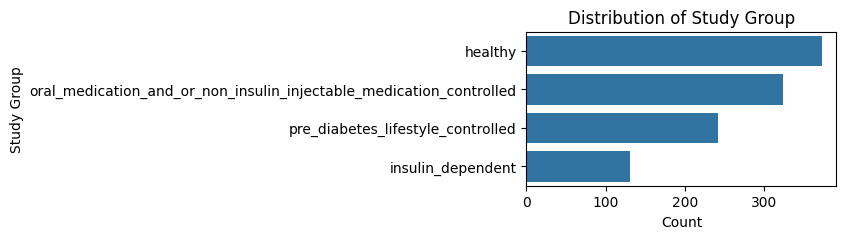

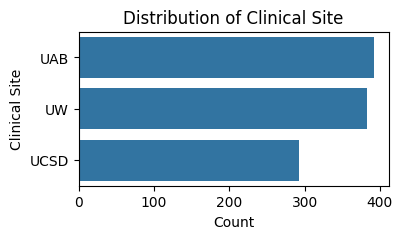

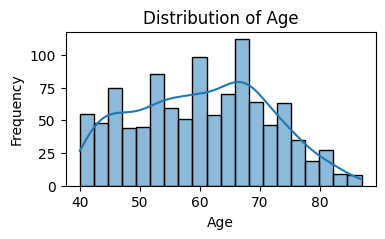

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot unique values for 'study_group'
plt.figure(figsize=(4, 2))
sns.countplot(y='study_group', data=data_participants, order=data_participants['study_group'].value_counts().index)
plt.title('Distribution of Study Group')
plt.xlabel('Count')
plt.ylabel('Study Group')
plt.show()

# Plot unique values for 'clinical_site'
plt.figure(figsize=(4, 2))
sns.countplot(y='clinical_site', data=data_participants, order=data_participants['clinical_site'].value_counts().index)
plt.title('Distribution of Clinical Site')
plt.xlabel('Count')
plt.ylabel('Clinical Site')
plt.show()

# Plot distribution of 'age'
plt.figure(figsize=(4, 2))
sns.histplot(data_participants['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Analysis for condition_occurrence.csv

In [36]:
display(data_condition.head())
display(data_condition.describe(include='all'))

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,condition_status_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value
0,55,7148,4186898,2023-12-07,2023-12-07 00:00:00,2023-12-07,2023-12-07 00:00:00,45905770,32893,,0,20,0,"mhoccur_plm, Chronic pulmonary (lung) problems (E",0,
1,5364,1120,2005200017,2024-01-24,2024-01-24 00:00:00,2024-01-24,2024-01-24 00:00:00,45905770,32893,,0,1593,0,"mhoccur_rnl, Kidney problems",0,
2,2975,4030,433736,2023-10-10,2023-10-10 00:00:00,2023-10-10,2023-10-10 00:00:00,45905770,32893,,0,863,0,"mhoccur_obs, Obesity",0,
3,2306,7324,46271045,2024-05-28,2024-05-28 00:00:00,2024-05-28,2024-05-28 00:00:00,45905770,32893,,0,678,0,"mhoccur_cns, Other neurological conditions",0,
4,2456,7231,316866,2024-02-20,2024-02-20 00:00:00,2024-02-20,2024-02-20 00:00:00,45905770,32893,,0,710,0,"mhoccur_hbp, High blood pressure",0,


,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,condition_status_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value
count,5902.000000,5902.000000,5.902000e+03,5902,5902,5902,5902,5902.0,5902.0,5902,5902.0,5902.000000,5902.0,5902,5902.0,5902
unique,NaN,NaN,NaN,232,232,232,232,NaN,NaN,1,NaN,NaN,NaN,31,NaN,1
top,NaN,NaN,NaN,2024-02-23,2024-02-23 00:00:00,2024-02-23,2024-02-23 00:00:00,NaN,NaN,,NaN,NaN,NaN,"mhoccur_hbp, High blood pressure",NaN,
freq,NaN,NaN,NaN,325,325,325,325,NaN,NaN,5902,NaN,NaN,NaN,571,NaN,5902
mean,3475.643002,4461.543883,3.256679e+08,NaN,NaN,NaN,NaN,45905770.0,32893.0,NaN,0.0,1031.632497,0.0,NaN,0.0,NaN
std,2007.301903,2529.154098,7.334479e+08,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,595.110604,0.0,NaN,0.0,NaN
min,3.000000,1001.000000,8.050200e+04,NaN,NaN,NaN,NaN,45905770.0,32893.0,NaN,0.0,2.000000,0.0,NaN,0.0,NaN
25%,1748.500000,1306.000000,3.749190e+05,NaN,NaN,NaN,NaN,45905770.0,32893.0,NaN,0.0,540.500000,0.0,NaN,0.0,NaN
50%,3469.500000,4203.000000,4.159131e+06,NaN,NaN,NaN,NaN,45905770.0,32893.0,NaN,0.0,1026.000000,0.0,NaN,0.0,NaN
75%,5208.500000,7186.000000,4.317977e+06,NaN,NaN,NaN,NaN,45905770.0,32893.0,NaN,0.0,1530.500000,0.0,NaN,0.0,NaN


In [48]:
# Function to get all the columns with zeros or empty strings

def extract_empty_col(df):
    # To check if any missing values exits and columns with empty
    empty_columns_df = ((df == 0) | (df == " ")).all()
    empty_columns_list = empty_columns_df[empty_columns_df].index.to_list()

    return empty_columns_list

In [49]:
# Dropping the columns with empty values
for df in [data_condition, data_measurement, data_observation, data_person, data_procedure, data_visit]:
    
    empty_list = extract_empty_col(df)
    print(empty_list)
    df.drop(empty_list, inplace=True, axis=1)

['stop_reason', 'provider_id', 'visit_detail_id', 'condition_source_concept_id', 'condition_status_source_value']
['value_as_concept_id', 'unit_concept_id', 'provider_id', 'visit_detail_id', 'measurement_source_concept_id', 'unit_source_concept_id', 'measurement_event_id', 'meas_event_field_concept_id']
['unit_concept_id', 'provider_id', 'visit_detail_id', 'observation_source_concept_id', 'observation_event_id', 'obs_event_field_concept_id']
['gender_concept_id', 'month_of_birth', 'day_of_birth', 'race_concept_id', 'ethnicity_concept_id', 'location_id', 'provider_id', 'care_site_id', 'person_source_value', 'gender_source_value', 'gender_source_concept_id', 'race_source_value', 'race_source_concept_id', 'ethnicity_source_value', 'ethnicity_source_concept_id']
['provider_id', 'visit_detail_id', 'procedure_source_concept_id']
['provider_id', 'care_site_id', 'admitted_from_concept_id', 'admitted_from_source_value', 'discharged_to_concept_id', 'discharged_to_source_value', 'preceding_visit_

In [9]:
# Useful Variables from the person.csv file

display(data_person.head())

print(data_person.shape)

print("Unique number of person id", len(data_person['person_id'].unique()))

,person_id,year_of_birth,birth_datetime
0,4220,1961,1970-01-01 00:00:00
1,7069,1982,1970-01-01 00:00:00
2,1376,1967,1970-01-01 00:00:00
3,1004,1961,1970-01-01 00:00:00
4,7258,1969,1970-01-01 00:00:00


(1067, 3)
Unique number of person id 1067


In [10]:
# Useful Variables from the data_condition.csv file

display(data_condition.head())

print(data_condition.shape)

print("Unique number of person id", len(data_condition['person_id'].unique()))

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,condition_status_concept_id,visit_occurrence_id,condition_source_value
0,55,7148,4186898,2023-12-07,2023-12-07 00:00:00,2023-12-07,2023-12-07 00:00:00,45905770,32893,20,"mhoccur_plm, Chronic pulmonary (lung) problems (E"
1,5364,1120,2005200017,2024-01-24,2024-01-24 00:00:00,2024-01-24,2024-01-24 00:00:00,45905770,32893,1593,"mhoccur_rnl, Kidney problems"
2,2975,4030,433736,2023-10-10,2023-10-10 00:00:00,2023-10-10,2023-10-10 00:00:00,45905770,32893,863,"mhoccur_obs, Obesity"
3,2306,7324,46271045,2024-05-28,2024-05-28 00:00:00,2024-05-28,2024-05-28 00:00:00,45905770,32893,678,"mhoccur_cns, Other neurological conditions"
4,2456,7231,316866,2024-02-20,2024-02-20 00:00:00,2024-02-20,2024-02-20 00:00:00,45905770,32893,710,"mhoccur_hbp, High blood pressure"


(5902, 11)
Unique number of person id 1034


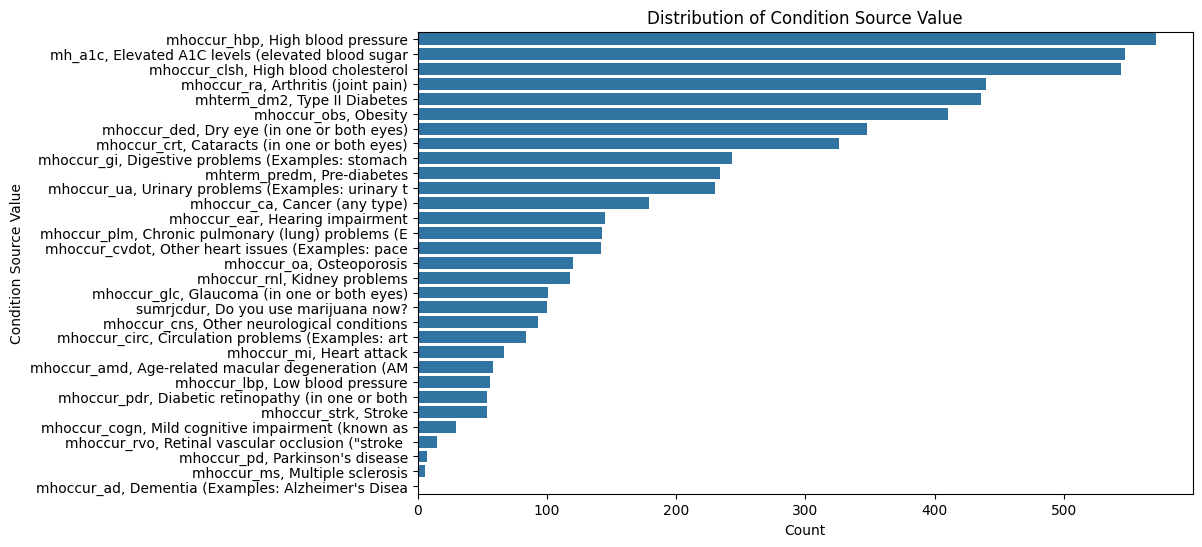

In [40]:
import matplotlib.pyplot as plt

# Display the unique values and their counts
condition_source_value_counts = condition_data['condition_source_value'].value_counts()
# display(condition_source_value_counts)

# Plot the distribution of condition_source_value
plt.figure(figsize=(10, 6))
sns.countplot(y='condition_source_value', data=condition_data, order=condition_source_value_counts.index)
plt.title('Distribution of Condition Source Value')
plt.xlabel('Count')
plt.ylabel('Condition Source Value')
plt.show()

## Block to find the common column across all the dataframes

In [ ]:
from collections import Counter

# List of DataFrames
dfs = [data_condition, data_measurement, data_observation, data_person, data_procedure, data_visit]

# Collect all column names from all DataFrames
all_columns = []
for df in dfs:
    all_columns.extend(df.columns)  # Add columns from each DataFrame to the list

# Count occurrences of each column
column_counts = Counter(all_columns)

# Get columns that occur more than once
duplicate_columns = [col for col, count in column_counts.items() if count > 1]

# Output
print(f"Columns occurring more than once ({len(duplicate_columns)}):", duplicate_columns)


Columns occurring more than once (12): ['person_id', 'provider_id', 'visit_occurrence_id', 'visit_detail_id', 'value_as_number', 'value_as_concept_id', 'unit_concept_id', 'unit_source_value', 'value_source_value', 'qualifier_concept_id', 'qualifier_source_value', 'care_site_id']


In [44]:
# Check which duplicate columns exist in data_person
def is_duplicate_columns(df):
    columns_in_data_person = [col for col in duplicate_columns if col in df.columns]

    # Output
    print(f"Columns from duplicate_columns that exist in ({len(columns_in_data_person)}):", columns_in_data_person)


In [45]:
for df in [data_condition, data_measurement, data_observation, data_person, data_procedure, data_visit]:
    is_duplicate_columns(df)

Columns from duplicate_columns that exist in (4): ['person_id', 'provider_id', 'visit_occurrence_id', 'visit_detail_id']
Columns from duplicate_columns that exist in (11): ['person_id', 'provider_id', 'visit_occurrence_id', 'visit_detail_id', 'value_as_number', 'value_as_concept_id', 'unit_concept_id', 'unit_source_value', 'value_source_value', 'qualifier_concept_id', 'qualifier_source_value']
Columns from duplicate_columns that exist in (11): ['person_id', 'provider_id', 'visit_occurrence_id', 'visit_detail_id', 'value_as_number', 'value_as_concept_id', 'unit_concept_id', 'unit_source_value', 'value_source_value', 'qualifier_concept_id', 'qualifier_source_value']
Columns from duplicate_columns that exist in (3): ['person_id', 'provider_id', 'care_site_id']
Columns from duplicate_columns that exist in (4): ['person_id', 'provider_id', 'visit_occurrence_id', 'visit_detail_id']
Columns from duplicate_columns that exist in (4): ['person_id', 'provider_id', 'visit_occurrence_id', 'care_sit

## Analysis for measurements.csv

In [14]:
data_measurement.head()

,measurement_id,person_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_time,measurement_type_concept_id,operator_concept_id,value_as_number,range_low,range_high,visit_occurrence_id,measurement_source_value,unit_source_value,value_source_value,qualifier_concept_id,qualifier_source_value
0,20452,7289,2005200055,2024-05-14,2024-05-14 00:00:00,,32862,0,40.00,NaN,NaN,760,"viaosmsf, Snellen fraction - Mesopic VA - OS",,,0.0,
1,111043,7043,3017250,2024-02-29,2024-02-29 00:00:00,00:00:00,32856,4172703,28.30,0.0,0.0,121,Urine Creatinine (mg/dL),mg/DL,28.3,NaN,NaN
2,42372,1102,2005200182,2024-01-09,2024-01-09 00:00:00,,32862,0,10.58,NaN,NaN,1563,"lbscat_wbc, White Blood Cells (WBC) - x10E3/µL",,,0.0,
3,32175,4243,2005200056,2024-06-26,2024-06-26 00:00:00,,32862,0,45.00,NaN,NaN,1186,"viaodmlog, LLVA Letter Score - Mesopic VA - OD",,,45876703.0,Right eye
4,54995,1311,2005200012,2024-06-04,2024-06-04 00:00:00,,32862,0,25.00,NaN,NaN,2036,"viaodpsf, Snellen fraction - Photopic VA - OD",,,0.0,


In [54]:
empty_list = extract_empty_col(data_measurement)
data_measurement.drop(empty_list, inplace=True, axis=1)

## Data Report

In [30]:
import pandas as pd

# Load the condition_occurrence.csv file
file_path = 'clinical_data/condition_occurrence.csv'
condition_data = pd.read_csv(file_path)

# Generate a data report for the columns in the condition_occurrence.csv
condition_report = {
    "Column Name": condition_data.columns,
    "Non-Null Count": condition_data.notnull().sum(),
    "Unique Values Count": condition_data.nunique(),
    "Data Type": condition_data.dtypes,
    "Sample Values": [condition_data[col].dropna().unique()[:5].tolist() for col in condition_data.columns]
}

# Convert the report into a DataFrame for better readability
condition_report_df = pd.DataFrame(condition_report)
condition_report_df


,Column Name,Non-Null Count,Unique Values Count,Data Type,Sample Values
condition_occurrence_id,condition_occurrence_id,5902,5902,int64,"[55, 5364, 2975, 2306, 2456]"
person_id,person_id,5902,1034,int64,"[7148, 1120, 4030, 7324, 7231]"
condition_concept_id,condition_concept_id,5902,31,int64,"[4186898, 2005200017, 433736, 46271045, 316866]"
condition_start_date,condition_start_date,5902,232,object,"[2023-12-07, 2024-01-24, 2023-10-10, 2024-05-2..."
condition_start_datetime,condition_start_datetime,5902,232,object,"[2023-12-07 00:00:00, 2024-01-24 00:00:00, 202..."
condition_end_date,condition_end_date,5902,232,object,"[2023-12-07, 2024-01-24, 2023-10-10, 2024-05-2..."
condition_end_datetime,condition_end_datetime,5902,232,object,"[2023-12-07 00:00:00, 2024-01-24 00:00:00, 202..."
condition_type_concept_id,condition_type_concept_id,5902,1,int64,[45905770]
condition_status_concept_id,condition_status_concept_id,5902,1,int64,[32893]
stop_reason,stop_reason,5902,1,object,[ ]


In [31]:
condition_data['condition_source_value'].unique()

array(['mhoccur_plm, Chronic pulmonary (lung) problems (E',
       'mhoccur_rnl, Kidney problems', 'mhoccur_obs, Obesity',
       'mhoccur_cns, Other neurological conditions',
       'mhoccur_hbp, High blood pressure',
       'mhoccur_lbp, Low blood pressure', 'mhterm_dm2, Type II Diabetes',
       'mhoccur_crt, Cataracts (in one or both eyes)',
       'mhoccur_circ, Circulation problems (Examples: art',
       'mhoccur_cvdot, Other heart issues (Examples: pace',
       'mhoccur_oa, Osteoporosis', 'mhoccur_clsh, High blood cholesterol',
       'mh_a1c, Elevated A1C levels (elevated blood sugar',
       'mhoccur_ra, Arthritis (joint pain)',
       'mhoccur_ear, Hearing impairment',
       'sumrjcdur, Do you use marijuana now?',
       'mhoccur_ua, Urinary problems (Examples: urinary t',
       'mhoccur_ca, Cancer (any type)',
       'mhoccur_glc, Glaucoma (in one or both eyes)',
       'mhoccur_ded, Dry eye (in one or both eyes)',
       'mhterm_predm, Pre-diabetes',
       'mhoccur_gi,

In [32]:
condition_data['condition_start_date'] = pd.to_datetime(condition_data['condition_start_date'])
condition_data['condition_end_date'] = pd.to_datetime(condition_data['condition_end_date'])
condition_data['condition_start_datetime'] = pd.to_datetime(condition_data['condition_start_datetime'])
condition_data['condition_end_datetime'] = pd.to_datetime(condition_data['condition_end_datetime'])

# Find the minimum start date and maximum end date
min_start_date = condition_data['condition_start_date'].min()
max_end_date = condition_data['condition_end_date'].max()

# Display the results
print("Minimum condition start date:", min_start_date)
print("Maximum condition end date:", max_end_date)

Minimum condition start date: 2023-07-17 00:00:00
Maximum condition end date: 2024-07-29 00:00:00


##

In [154]:
# Glucose Monitor Data Analysis

import numpy as np

# Read the JSON file
json_file_path = 'wearable_blood_glucose/continuous_glucose_monitoring/dexcom_g6/1004/1004_DEX.json'
data_json = pd.read_json(json_file_path)

# Retrieve all blood glucose values from all CGM entries
blood_glucose_values = []
for cgm_entry in data_json['body']['cgm']:
    blood_glucose_values.append(cgm_entry['blood_glucose']['value'])

print(blood_glucose_values)

drop_low_strings = [x for x in blood_glucose_values if x != 'Low' and x != 'High']
print(drop_low_strings)

average_blood_glucose = np.mean(drop_low_strings)
print(average_blood_glucose)

[146, 145, 147, 149, 152, 153, 152, 153, 153, 151, 150, 148, 148, 148, 150, 147, 144, 143, 145, 133, 133, 133, 131, 128, 124, 124, 123, 122, 125, 125, 124, 110, 103, 93, 106, 120, 98, 78, 94, 99, 103, 117, 113, 107, 99, 91, 82, 77, 94, 112, 128, 123, 115, 127, 100, 119, 96, 95, 99, 103, 133, 130, 129, 104, 79, 77, 77, 79, 91, 114, 124, 135, 156, 159, 162, 168, 185, 191, 195, 202, 207, 215, 211, 195, 181, 171, 160, 171, 192, 200, 198, 192, 191, 189, 187, 188, 200, 217, 240, 271, 292, 305, 309, 304, 294, 285, 266, 261, 268, 264, 253, 237, 227, 210, 203, 204, 209, 215, 205, 213, 213, 212, 195, 170, 151, 135, 144, 149, 153, 186, 196, 208, 218, 227, 236, 239, 239, 239, 240, 233, 225, 213, 199, 195, 189, 176, 162, 146, 140, 129, 122, 107, 110, 119, 117, 117, 115, 113, 116, 129, 145, 151, 152, 142, 130, 122, 121, 135, 134, 148, 154, 159, 162, 162, 161, 146, 141, 141, 144, 147, 146, 153, 160, 168, 172, 175, 177, 177, 176, 171, 166, 163, 161, 158, 160, 161, 163, 162, 177, 184, 185, 179, 173, 16

In [155]:
for cgm_entry in data_json['body']['cgm']:
    # split the string to get the date and time
    
    timestamps.append(cgm_entry['effective_time_frame']['time_interval']['start_date_time'].split('T'))
    
print(timestamps)

[['2023-08-08', '17:34:15Z'], ['2023-08-08', '17:39:15Z'], ['2023-08-08', '17:44:15Z'], ['2023-08-08', '17:49:15Z'], ['2023-08-08', '17:54:15Z'], ['2023-08-08', '17:59:15Z'], ['2023-08-08', '18:04:15Z'], ['2023-08-08', '18:09:15Z'], ['2023-08-08', '18:14:15Z'], ['2023-08-08', '18:19:15Z'], ['2023-08-08', '18:24:15Z'], ['2023-08-08', '18:29:15Z'], ['2023-08-08', '18:34:15Z'], ['2023-08-08', '18:39:15Z'], ['2023-08-08', '18:44:15Z'], ['2023-08-08', '18:49:15Z'], ['2023-08-08', '18:54:15Z'], ['2023-08-08', '18:59:15Z'], ['2023-08-08', '19:04:15Z'], ['2023-08-08', '19:09:15Z'], ['2023-08-08', '19:14:15Z'], ['2023-08-08', '19:19:15Z'], ['2023-08-08', '19:24:15Z'], ['2023-08-08', '19:29:15Z'], ['2023-08-08', '19:34:15Z'], ['2023-08-08', '19:39:15Z'], ['2023-08-08', '19:44:15Z'], ['2023-08-08', '19:49:15Z'], ['2023-08-08', '19:54:15Z'], ['2023-08-08', '19:59:15Z'], ['2023-08-08', '20:04:15Z'], ['2023-08-08', '20:09:15Z'], ['2023-08-08', '20:14:15Z'], ['2023-08-08', '20:19:15Z'], ['2023-08-08'

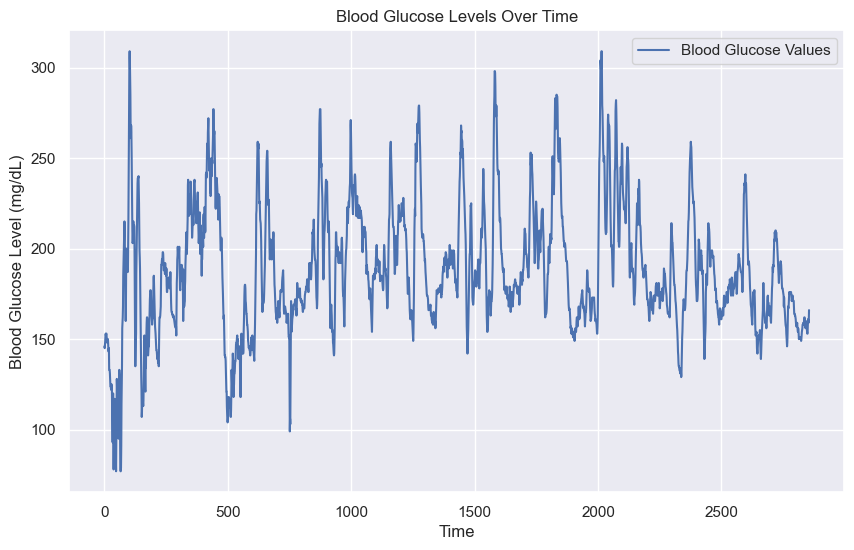

In [158]:
# Convert timestamps to datetime objects for better plotting
timestamps_dt = [pd.to_datetime(date + ' ' + time) for date, time in timestamps]

# Plot the blood glucose values over time
plt.figure(figsize=(10, 6))
plt.plot(blood_glucose_values, label='Blood Glucose Values')
plt.xlabel('Time')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.title('Blood Glucose Levels Over Time')
plt.legend()
plt.show()

In [ ]:
import os
from matplotlib.pyplot import prism
import pandas as pd
import json

# Function to load JSON data from a folder and extract relevant information like patient id, timestamp, and blood glucose level

folder_path = "wearable_blood_glucose/continuous_glucose_monitoring/dexcom_g6/"
def load_json_data(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        files = os.listdir(folder_path+filename)[0]
        
        print(files)
        if files.endswith(".json"):
            with open(os.path.join(folder_path, filename+'/'+files), 'r') as file:
                data = json.load(file)
                patient_id = data['header']['patient_id']
                cgm_data = data['body']['cgm']
                for entry in cgm_data:
                    record = {
                        "patient_id": patient_id,
                        "timestamp": entry['effective_time_frame']['time_interval']['start_date_time'],
                        "blood_glucose": entry['blood_glucose']['value']
                    }
                    all_data.append(record)
    return pd.DataFrame(all_data)

# Example: Load continuous glucose monitoring data
glucose_data = load_json_data(folder_path)
print(glucose_data)


In [193]:
import os
import json
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# Function to process a single JSON file
def process_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            patient_id = data['header']['patient_id']
            cgm_data = data['body']['cgm']
            return [
                {
                    "patient_id": patient_id,
                    "timestamp": entry['effective_time_frame']['time_interval']['start_date_time'],
                    "blood_glucose": entry['blood_glucose']['value']
                }
                for entry in cgm_data
            ]
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return []

# Function to load JSON data from a folder
def load_json_data_parallel(folder_path):
    all_files = []
    for patient_dir in os.listdir(folder_path):
        print(patient_dir)
        patient_path = os.path.join(folder_path, patient_dir)
        if os.path.isdir(patient_path):
            files = [
                os.path.join(patient_path, f)
                for f in os.listdir(patient_path)
                if f.endswith(".json")
            ]
            all_files.extend(files)
    
    all_data = []
    with ThreadPoolExecutor() as executor:
        results = executor.map(process_json_file, all_files)
        for result in results:
            all_data.extend(result)
    
    return pd.DataFrame(all_data)

# Example: Load continuous glucose monitoring data
folder_path = "wearable_blood_glucose/continuous_glucose_monitoring/dexcom_g6/"
glucose_data = load_json_data_parallel(folder_path)
print(glucose_data)


1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1188
1189
1190
1191
1192
1193
1194
1195
1196
1198
1199
1200
1201
1202
1203
1204
1205
